## Importing the required libraries 

In [2]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

## Pre-Processing/Preparing dataset

In [4]:
# setting the path of training dataset
DIRECTORY=r"/content/drive/MyDrive/chest_xray/train"
CATEGORIES=["NORMAL","PNEUMONIA"]

In [5]:
for category in CATEGORIES:
  folder = os.path.join(DIRECTORY,category)
  count=0
  for img in os.listdir(folder):
    count+=1;
  print(f"The {category} xrays are {count}")

print("----------------------------------")

labels = [i for i in range(len(CATEGORIES))]
labeldict={}
for i in range (len(CATEGORIES)):
    labeldict[CATEGORIES[i]]=labels[i]
print(labeldict)

The NORMAL xrays are 3342
The PNEUMONIA xrays are 3875
----------------------------------
{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
# Normal category Data was half of the Pneumonia data, 
# Therefore Data Augmentation on Normal class is being done 
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

datagen = ImageDataGenerator(
    rotation_range=5,
    shear_range=0.02,
    zoom_range=0.02,
    fill_mode='nearest'
)
img = load_img('/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0637-0001.jpeg')
x = img_to_array(img)
x = x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x,batch_size=1,save_to_dir='/content/drive/MyDrive/chest_xray/train/NORMAL',save_prefix='Normaldatagen',save_format='JPEG'):
  i+=1
  if i>800:
    break

In [6]:
# Now again counting the number of data in both the category after performing data augmentation 
for category in CATEGORIES:
  folder = os.path.join(DIRECTORY,category)
  count=0
  for img in os.listdir(folder):
    count+=1;
  print(f"The {category} xrays are {count}")
  

The NORMAL xrays are 3342
The PNEUMONIA xrays are 3875


In [7]:
# Preparing the dataset
data=[]
for category in CATEGORIES:
  folder = os.path.join(DIRECTORY,category)
  # print(folder)
  label = CATEGORIES.index(category)
  for img in os.listdir(folder):
    img_path = os.path.join(folder,img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(120,120))
    # plt.imshow(img_arr)
    data.append([img_arr,label])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


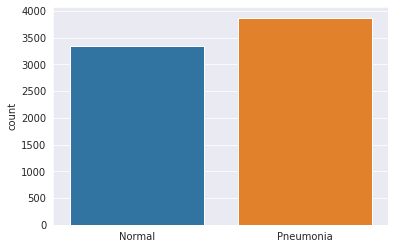

In [8]:
# Plotting the count of data 
list = []
for i in data:
    if(i[1] == 0):
        list.append("Normal")
    else:
        list.append("Pneumonia")
sns.set_style('darkgrid')
sns.countplot(list)
plt.show()

In [9]:
len(data)

7217

In [10]:
# shuffling the dataset, so that the model dont get overfit
random.shuffle(data)

In [11]:
# Splitting the features and target, in X and Y
X=[]
Y=[]

for feature,labels in data:
    X.append(feature)
    Y.append(labels)

In [12]:
# printing the length of the X and Y data 
print(f"length of X : {len(X)}\nlength of Y : {len(Y)}")

length of X : 7217
length of Y : 7217


In [13]:
# Converting the X and Y values to numpy array
X=np.array(X)
Y=np.array(Y)

In [14]:
Y

array([0, 0, 0, ..., 1, 1, 0])

In [15]:
# reshaping X and Y
X=X/255
X=np.reshape(X,(X.shape[0],120,120,3))
print(X[0])

from keras.utils import np_utils
Y=np_utils.to_categorical(Y)
print(Y[0])

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.28235294 0.28235294 0.28235294]
  [0.28627451 0.28627451 0.28627451]
  [0.24705882 0.24705882 0.24705882]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.28235294 0.28235294 0.28235294]
  [0.2745098  0.2745098  0.2745098 ]
  [0.25098039 0.25098039 0.25098039]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.27843137 0.27843137 0.27843137]
  [0.27843137 0.27843137 0.27843137]
  [0.25098039 0.25098039 0.25098039]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.02745098 0.02745098 0.02745098]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


In [35]:
X.shape[1:]

(120, 120, 3)

## Creating Cnn-Architecture and Modelling the data

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation

In [3]:
# creating cnn model 
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

NameError: name 'X' is not defined

In [18]:
# splitting the data into train and test using train test split 
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(X,Y,test_size=0.2)


In [19]:
print(f'train data : {len(train_data)}\ntest data : {len(test_data)}')

train data : 5773
test data : 1444


In [20]:
# fitting the training data into model
history=model.fit(train_data,train_target,epochs=15,validation_split=0.2,verbose=1)

Epoch 1/15
145/145 [==============================] - 90s 612ms/step - loss: 0.5390 - accuracy: 0.7358 - val_loss: 0.3805 - val_accuracy: 0.9247
Epoch 2/15
145/145 [==============================] - 88s 610ms/step - loss: 0.2260 - accuracy: 0.9184 - val_loss: 0.1437 - val_accuracy: 0.9515
Epoch 3/15
145/145 [==============================] - 89s 611ms/step - loss: 0.1639 - accuracy: 0.9430 - val_loss: 0.1369 - val_accuracy: 0.9550
Epoch 4/15
145/145 [==============================] - 89s 613ms/step - loss: 0.1408 - accuracy: 0.9485 - val_loss: 0.0980 - val_accuracy: 0.9706
Epoch 5/15
145/145 [==============================] - 88s 608ms/step - loss: 0.1256 - accuracy: 0.9576 - val_loss: 0.1120 - val_accuracy: 0.9680
Epoch 6/15
145/145 [==============================] - 88s 606ms/step - loss: 0.1030 - accuracy: 0.9662 - val_loss: 0.1035 - val_accuracy: 0.9671
Epoch 7/15
145/145 [==============================] - 88s 606ms/step - loss: 0.0968 - accuracy: 0.9669 - val_loss: 0.0923 - val_ac

## Evaluating the CNN-Model

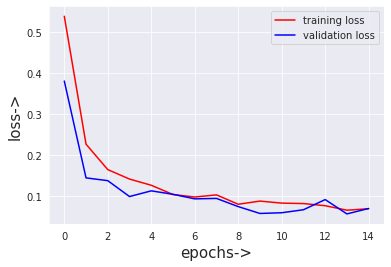

In [22]:
# plotting the line of training loss
plt.plot(history.history['loss'],'red',label='training loss')
plt.plot(history.history['val_loss'],'blue',label='validation loss')
plt.xlabel("epochs->",size=15)
plt.ylabel("loss->",size=15)
plt.legend()
plt.show()

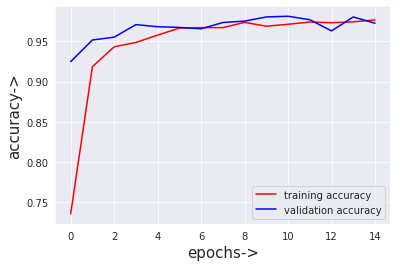

In [23]:
# plotting the line of training accuracy
plt.plot(history.history['accuracy'],'red',label='training accuracy')
plt.plot(history.history['val_accuracy'],'blue',label='validation accuracy')
plt.xlabel("epochs->",size=15)
plt.ylabel("accuracy->",size=15)
plt.legend()
plt.show()

In [30]:
print(model.evaluate(test_data,test_target,verbose=1))

46/46 [==============================] - 7s 137ms/step - loss: 0.0758 - accuracy: 0.9730
[0.07580330222845078, 0.9729917049407959]


## Saving the Model

In [29]:
model.save("/content/drive/MyDrive/Colab Notebooks/Pnemonia_prediction_cnn_model.h5")

In [32]:
np.save("/content/drive/MyDrive/Colab Notebooks/data",X)
np.save("/content/drive/MyDrive/Colab Notebooks/target",Y)

## Testing the Model/ Detecting the Images

In [12]:
# Test the xray images by providing the image path
def Detect(imagePath):
    image=cv2.imread(imagePath)
    resized=cv2.resize(image,(120,120),fx=0.5,fy=0.5)
    normalized=resized/255
    reshaped=np.reshape(normalized,(1,120,120,3))
    result=model.predict(reshaped)
    label=np.argmax(result,axis=1)[0]
    prob=np.max(result,axis=1)[0]
    prob=round(prob,2)*100
    print(result)
    print(label)
    print(prob)

In [18]:
model=LoadCnn()

Detect("D:/Pneumonia detection/chest_xray/chest_xray/test/NORMAL/IM-0003-0001.jpeg")

[[0.1264402  0.87355983]]
1
87.00000047683716


In [19]:
n= 87.00000047683716
print(round(n,2))

87.0
